In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

Reading & Understanding the Dataset

In [2]:
df = pd.read_csv('energy_dataset.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
df.describe()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation_biomass                           35045 non-null  float64
 2   generation_fossil_brown_coal/lignite         35046 non-null  float64
 3   generation_fossil_coal-derived_gas           35046 non-null  float64
 4   generation_fossil_gas                        35046 non-null  float64
 5   generation_fossil_hard_coal                  35046 non-null  float64
 6   generation_fossil_oil                        35045 non-null  float64
 7   generation_fossil_oil_shale                  35046 non-null  float64
 8   generation_fossil_peat                       35046 non-null  float64
 9   generation_geothermal                        35046 non-null  float64
 10

In [5]:
df.corr()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_marine,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_offshore_eday_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
generation_biomass,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,NaN,-0.044898,-0.284877,-0.033675,NaN,-0.021279,0.658488,-0.560588,-0.004687,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation_fossil_brown_coal/lignite,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,NaN,-0.323771,-0.525005,-0.229455,NaN,-0.008440,0.097600,0.104552,0.040447,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation_fossil_coal-derived_gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_fossil_gas,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,NaN,-0.420646,-0.271527,0.060173,NaN,-0.112904,-0.066279,0.334880,0.074716,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation_fossil_hard_coal,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,NaN,-0.406116,-0.497940,-0.157677,NaN,-0.023930,0.264383,-0.019426,0.046185,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation_fossil_oil,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,NaN,-0.331011,-0.106753,0.160465,NaN,0.015619,0.375046,-0.115087,0.100211,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation_fossil_oil_shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_fossil_peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_hydro_pumped_storage_aggregated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
correlations = df.corr(method='pearson')
print(correlations['price_actual'].sort_values(ascending=False).to_string())

price_actual                                   1.000000
price_day_ahead                                0.732155
generation_fossil_hard_coal                    0.465641
generation_fossil_gas                          0.461706
total_load_actual                              0.436127
total_load_forecast                            0.435864
generation_fossil_brown_coal/lignite           0.364088
generation_fossil_oil                          0.284679
generation_other_renewable                     0.256181
generation_waste                               0.169605
generation_biomass                             0.142369
forecast_solar_day_ahead                       0.101402
generation_other                               0.100048
generation_solar                               0.098488
generation_hydro_water_reservoir               0.071549
generation_nuclear                            -0.052596
generation_hydro_run-of-river_and_poundage    -0.137106
generation_wind_onshore                       -0

Data Preperation & EDA

In [7]:
missing_val=df.isnull().sum()
missing_percent=round((df.isna().mean())*100, 3)
pd.concat([missing_val,missing_percent],axis=1,keys=["Missing Values","Missing Percent"])

,Missing Values,Missing Percent
time,0,0.000
generation_biomass,19,0.054
generation_fossil_brown_coal/lignite,18,0.051
generation_fossil_coal-derived_gas,18,0.051
generation_fossil_gas,18,0.051
generation_fossil_hard_coal,18,0.051
generation_fossil_oil,19,0.054
generation_fossil_oil_shale,18,0.051
generation_fossil_peat,18,0.051
generation_geothermal,18,0.051


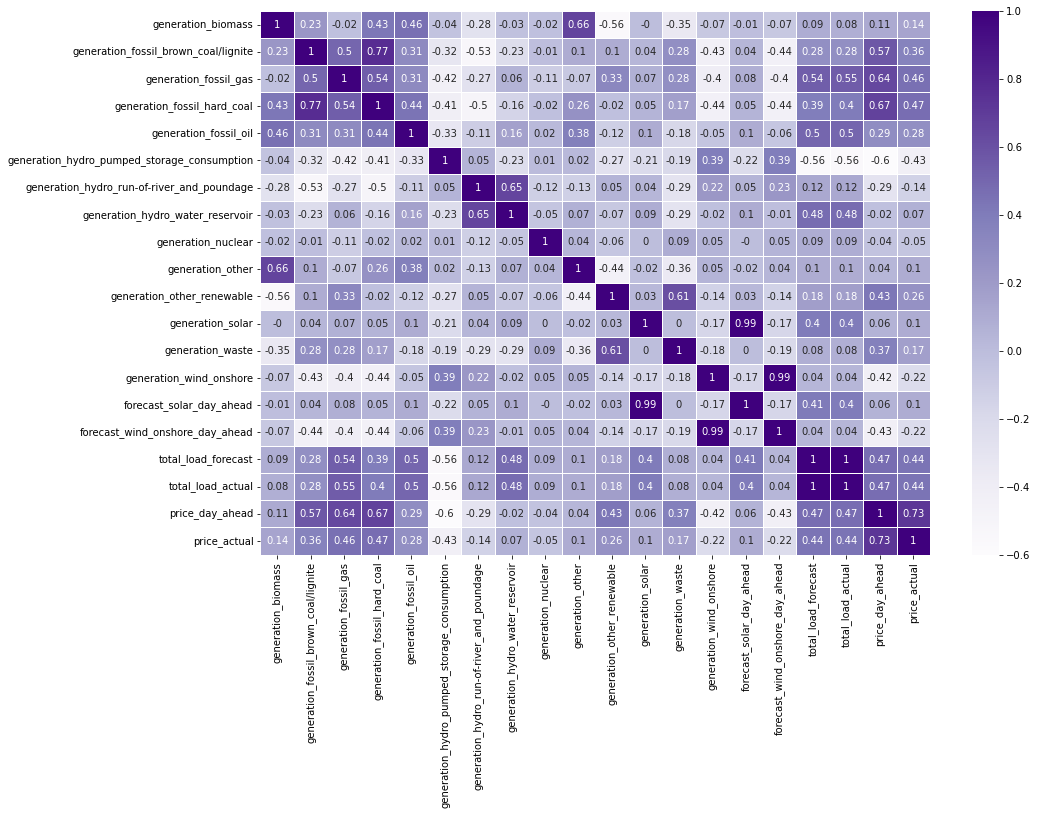

In [8]:
zero_val_cols = ['generation_marine',
                 'generation_geothermal',
                 'generation_fossil_peat',
                 'generation_wind_offshore',
                 'generation_fossil_oil_shale',
                 'forecast_wind_offshore_eday_ahead',
                 'generation_fossil_coal-derived_gas',
                 'generation_hydro_pumped_storage_aggregated']

# Drop Columns with zero values
heat_map_features = df.drop(columns=zero_val_cols,axis=1)

plt.figure(figsize=(15, 10))

sns.heatmap(round(heat_map_features.corr(), 2), annot=True, cmap='Purples', linewidths=0.9)
plt.show()


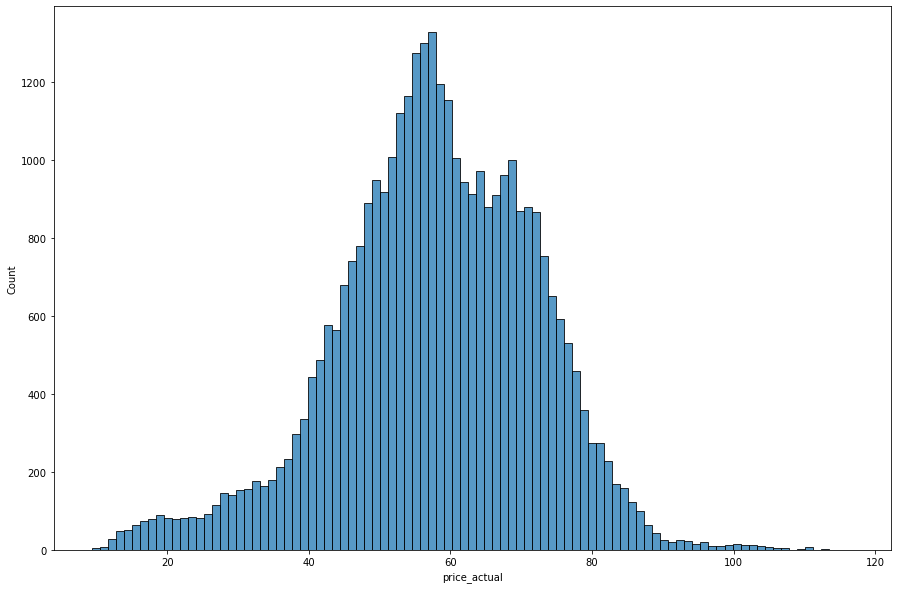

In [9]:
# Figure Size
plt.figure(figsize=(15,10))

# Hist graph to show distribution of target variable
sns.histplot(df,x='price_actual');

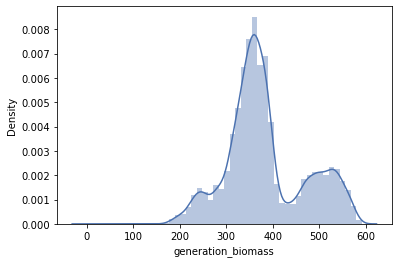

In [10]:
sns.set_color_codes()
sns.distplot(df['generation_biomass'], color="b")
plt.show()

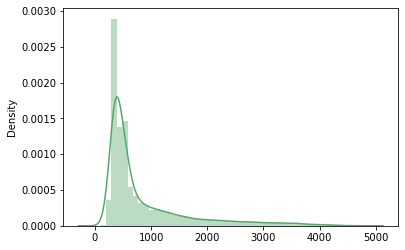

In [11]:
#create a new column to see the energy generated from renewable sources
renewable = df['generation_biomass'] + df['generation_geothermal'] + df['generation_hydro_pumped_storage_consumption'] 
+ df['generation_hydro_run-of-river_and_poundage'] + df['generation_hydro_water_reservoir'] + df['generation_marine'] + df['generation_other_renewable'] 
+ df['generation_solar'] + df['generation_wind_offshore'] + df['generation_wind_onshore']
sns.distplot(renewable, color="g")
plt.show()

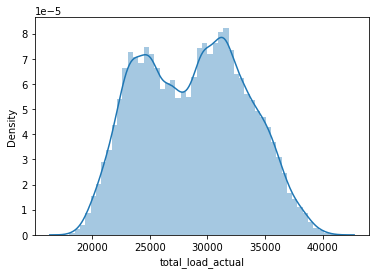

In [12]:
sns.distplot(df['total_load_actual'])
plt.show()

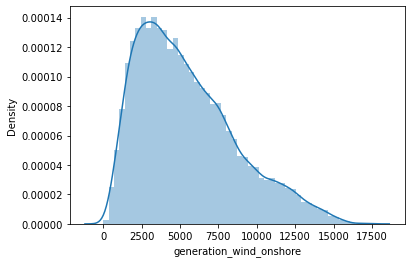

In [13]:
sns.distplot(df['generation_wind_onshore'])
plt.show()

In [14]:
#interpolating the missing values
df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [15]:
df.isnull().sum()

time                                               0
generation_biomass                                 0
generation_fossil_brown_coal/lignite               0
generation_fossil_coal-derived_gas                 0
generation_fossil_gas                              0
generation_fossil_hard_coal                        0
generation_fossil_oil                              0
generation_fossil_oil_shale                        0
generation_fossil_peat                             0
generation_geothermal                              0
generation_hydro_pumped_storage_aggregated     35064
generation_hydro_pumped_storage_consumption        0
generation_hydro_run-of-river_and_poundage         0
generation_hydro_water_reservoir                   0
generation_marine                                  0
generation_nuclear                                 0
generation_other                                   0
generation_other_renewable                         0
generation_solar                              

In [16]:
#Deleting the empty columns
df = df.drop(['generation_hydro_pumped_storage_aggregated'], axis=1)
df = df.drop(['forecast_wind_offshore_eday_ahead'], axis=1)

In [17]:
df.isnull().sum()

time                                           0
generation_biomass                             0
generation_fossil_brown_coal/lignite           0
generation_fossil_coal-derived_gas             0
generation_fossil_gas                          0
generation_fossil_hard_coal                    0
generation_fossil_oil                          0
generation_fossil_oil_shale                    0
generation_fossil_peat                         0
generation_geothermal                          0
generation_hydro_pumped_storage_consumption    0
generation_hydro_run-of-river_and_poundage     0
generation_hydro_water_reservoir               0
generation_marine                              0
generation_nuclear                             0
generation_other                               0
generation_other_renewable                     0
generation_solar                               0
generation_waste                               0
generation_wind_offshore                       0
generation_wind_onsh

In [18]:
df.dtypes

time                                            object
generation_biomass                             float64
generation_fossil_brown_coal/lignite           float64
generation_fossil_coal-derived_gas             float64
generation_fossil_gas                          float64
generation_fossil_hard_coal                    float64
generation_fossil_oil                          float64
generation_fossil_oil_shale                    float64
generation_fossil_peat                         float64
generation_geothermal                          float64
generation_hydro_pumped_storage_consumption    float64
generation_hydro_run-of-river_and_poundage     float64
generation_hydro_water_reservoir               float64
generation_marine                              float64
generation_nuclear                             float64
generation_other                               float64
generation_other_renewable                     float64
generation_solar                               float64
generation

In [19]:
categorical = list(df.select_dtypes ('object'))
categorical

['time']

In [20]:
categorical = ['time']

In [21]:
numerical = list(df.select_dtypes('float64'))
numerical

['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_coal-derived_gas',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_fossil_oil_shale',
 'generation_fossil_peat',
 'generation_geothermal',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_marine',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_offshore',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual']

In [22]:
numerical = ['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_coal-derived_gas',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_fossil_oil_shale',
 'generation_fossil_peat',
 'generation_geothermal',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_marine',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_offshore',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual']

Model creation for the prediction

Linear Regression

In [23]:
df_cat=df.select_dtypes(include=object)
df_num=df.select_dtypes(include=np.number)
df_dummy=pd.get_dummies(df_cat,drop_first=True)
df1=pd.concat([df_dummy,df_num],axis=1)

In [24]:
X=df1.drop('price_actual',axis=1)
y=df1['price_actual']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (26298, 35088)
The shape of X_test is: (8766, 35088)
The shape of y_train is: (26298,)
The shape of y_test is: (8766,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

In [ ]:
y_pred_lin = lin_model.predict(X_test)

In [ ]:
rsquared_lin = lin_model.score(X_train,y_train)
rmse_lin = mean_squared_error(y_test, y_pred_lin)

In [ ]:
# create a list of column names
features = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
results = pd.DataFrame(columns = features)

# compile the required information
model_metrics = pd.Series({'Model': 'Linear Regression Full Model',
                     'RMSE':rmse_lin,
                     'R-Squared': rsquared_lin})

# append the results to the table
results = results.append(model_metrics, ignore_index = True)
results

Ordinary Least Square Model

In [31]:
df_cat=df.select_dtypes(include=object)
df_num=df.select_dtypes(include=np.number)
df_dummy=pd.get_dummies(df_cat,drop_first=True)
df1=pd.concat([df_dummy,df_num],axis=1)

In [32]:
X=df1.drop('price_actual',axis=1)
y=df1['price_actual']


In [33]:
X= sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# print dimension of predictors train set
print("The shape of X_train is:", X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:", X_test.shape)

# print dimension of target train set
print("The shape of y_train is:", y_train.shape)

# print dimension of target test set
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (26298, 35089)
The shape of X_test is: (8766, 35089)
The shape of y_train is: (26298,)
The shape of y_test is: (8766,)


In [34]:
ols_model = sm.OLS(y_train, X_train).fit()

In [ ]:
predict = ols_model.predict(X_test)

model_rmse = mean_squared_error(y_test, predict)
model_rsquare = ols_model.rsquared

In [ ]:
# create a list of column names
features = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the columns
results = pd.DataFrame(columns = features)

# compiling the required information
model_metrics = pd.Series({'Model': 'Linear Regression Full Model',
                     'RMSE':model_rmse,
                     'R-Squared': model_rsquare})

# appending the results to the table
results = results.append(model_metrics, ignore_index = True)
results

XGBOOST

In [ ]:
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train)
XT_train = ordinal.transform(X_train)
XT_test = ordinal.transform(X_test)

# Simple imputer to fill nan values, then transform sets
simp = SimpleImputer(strategy='mean')
simp_fit = simp.fit(XT_train)
XT_train = simp.transform(XT_train)
XT_val = simp.transform(XT_test)

# Assigning model variables
rf = RandomForestRegressor()
xgbr=XGBRegressor()

# Fitting models
rf.fit(XT_train,y_train);
xbgr.fit(XT_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('Training MAE:', mean_absolute_error(y_train,model.predict(XT_train)))
    print('Test MAE:', mean_absolute_error(y_test,model.predict(XT_val)))
    print('Test R2 score:', model.score(XT_val,y_test))

model = [xgbr,rf]
for m in model:
  check_metrics(m)

After the implementations of the above methods, we can see that XGBoost Regressor performs much better than the linear regression techniques with less errors and rsquare score is better than double of it. 
When we apply the Random Forest Regression to our training and test dataset, we can see that rf also performs much better than the XGBoost. We had a 79% of R2 score on XGB, but RF regressor gave us 83% of R2 score.